### importing necessory libraries

In [56]:
# Basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

 

# Evaluation
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report)
    




In [57]:
df=pd.read_csv('C:/Users/HP/Desktop/project-walmart/customer_churn_pred.csv')

In [58]:
df.head()

,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,avg_resolution_time,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn
0,CUST_00001,Male,68,Bangladesh,London,SME,22,Web,Monthly,26,...,13.354360,Service,4.0,0,0.71,0.40,27,Satisfied,1,0
1,CUST_00002,Female,57,Canada,Sydney,Individual,9,Mobile,Monthly,7,...,25.140088,Billing,2.0,0,0.78,0.33,-19,Neutral,2,1
2,CUST_00003,Male,24,Germany,New York,SME,58,Web,Yearly,19,...,27.572928,Service,3.0,0,0.35,0.49,80,Neutral,1,0
3,CUST_00004,Male,49,Australia,Dhaka,Individual,19,Mobile,Yearly,34,...,26.420822,Technical,5.0,1,0.83,0.15,100,Neutral,0,0
4,CUST_00005,Male,65,Bangladesh,Delhi,Individual,52,Web,Monthly,20,...,26.674579,Technical,4.0,0,0.65,0.44,21,Unsatisfied,1,0


In [59]:
df.shape

(10000, 32)

### drop unnecessory column

In [60]:
df = df.drop(columns=['customer_id'])


### let's do exploratory data analysis 

In [61]:
df.isnull().sum()

gender                       0
age                          0
country                      0
city                         0
customer_segment             0
tenure_months                0
signup_channel               0
contract_type                0
monthly_logins               0
weekly_active_days           0
avg_session_time             0
features_used                0
usage_growth_rate            0
last_login_days_ago          0
monthly_fee                  0
total_revenue                0
payment_method               0
payment_failures             0
discount_applied             0
price_increase_last_3m       0
support_tickets              0
avg_resolution_time          0
complaint_type            2045
csat_score                   0
escalations                  0
email_open_rate              0
marketing_click_rate         0
nps_score                    0
survey_response              0
referral_count               0
churn                        0
dtype: int64

In [62]:
df[df['complaint_type'].isnull()]

,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,weekly_active_days,...,avg_resolution_time,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn
12,Male,65,Bangladesh,London,Individual,41,Web,Monthly,28,4,...,24.467868,NaN,2.0,0,0.36,0.26,19,Satisfied,1,0
14,Female,22,Germany,Delhi,Individual,2,Referral,Yearly,32,7,...,30.955885,NaN,3.0,0,0.21,0.19,55,Neutral,1,0
16,Female,32,Australia,New York,Individual,4,Web,Monthly,1,7,...,36.612991,NaN,3.0,0,0.32,0.13,3,Unsatisfied,0,1
20,Female,70,UK,London,Individual,5,Mobile,Quarterly,21,7,...,32.141569,NaN,3.0,0,0.32,0.30,-12,Neutral,1,0
21,Male,54,USA,London,SME,48,Web,Monthly,32,6,...,18.325894,NaN,5.0,2,0.81,0.36,25,Satisfied,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9972,Male,52,Bangladesh,New York,SME,23,Mobile,Quarterly,25,6,...,14.292726,NaN,4.0,1,0.65,0.31,50,Neutral,1,0
9986,Male,45,Bangladesh,Delhi,SME,55,Referral,Quarterly,28,7,...,33.767893,NaN,3.0,0,0.81,0.02,-84,Unsatisfied,3,0
9990,Female,19,India,Dhaka,SME,25,Web,Monthly,17,5,...,46.607105,NaN,2.0,0,0.53,0.04,25,Neutral,2,1
9996,Male,26,USA,Toronto,Individual,42,Mobile,Yearly,13,2,...,40.092087,NaN,4.0,0,0.48,0.06,28,Unsatisfied,2,0


In [63]:
df['complaint_type'].unique()

array(['Service', 'Billing', 'Technical', nan], dtype=object)

In [64]:
df['complaint_type'].value_counts(normalize=True) * 100


complaint_type
Technical    43.972344
Billing      30.509114
Service      25.518542
Name: proportion, dtype: float64

In [65]:
df['complaint_type'].value_counts(dropna=False, normalize=True) * 100


complaint_type
Technical    34.98
Billing      24.27
NaN          20.45
Service      20.30
Name: proportion, dtype: float64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  10000 non-null  object 
 1   age                     10000 non-null  int64  
 2   country                 10000 non-null  object 
 3   city                    10000 non-null  object 
 4   customer_segment        10000 non-null  object 
 5   tenure_months           10000 non-null  int64  
 6   signup_channel          10000 non-null  object 
 7   contract_type           10000 non-null  object 
 8   monthly_logins          10000 non-null  int64  
 9   weekly_active_days      10000 non-null  int64  
 10  avg_session_time        10000 non-null  float64
 11  features_used           10000 non-null  int64  
 12  usage_growth_rate       10000 non-null  float64
 13  last_login_days_ago     10000 non-null  int64  
 14  monthly_fee             10000 non-null 

### let's do some visualisation 

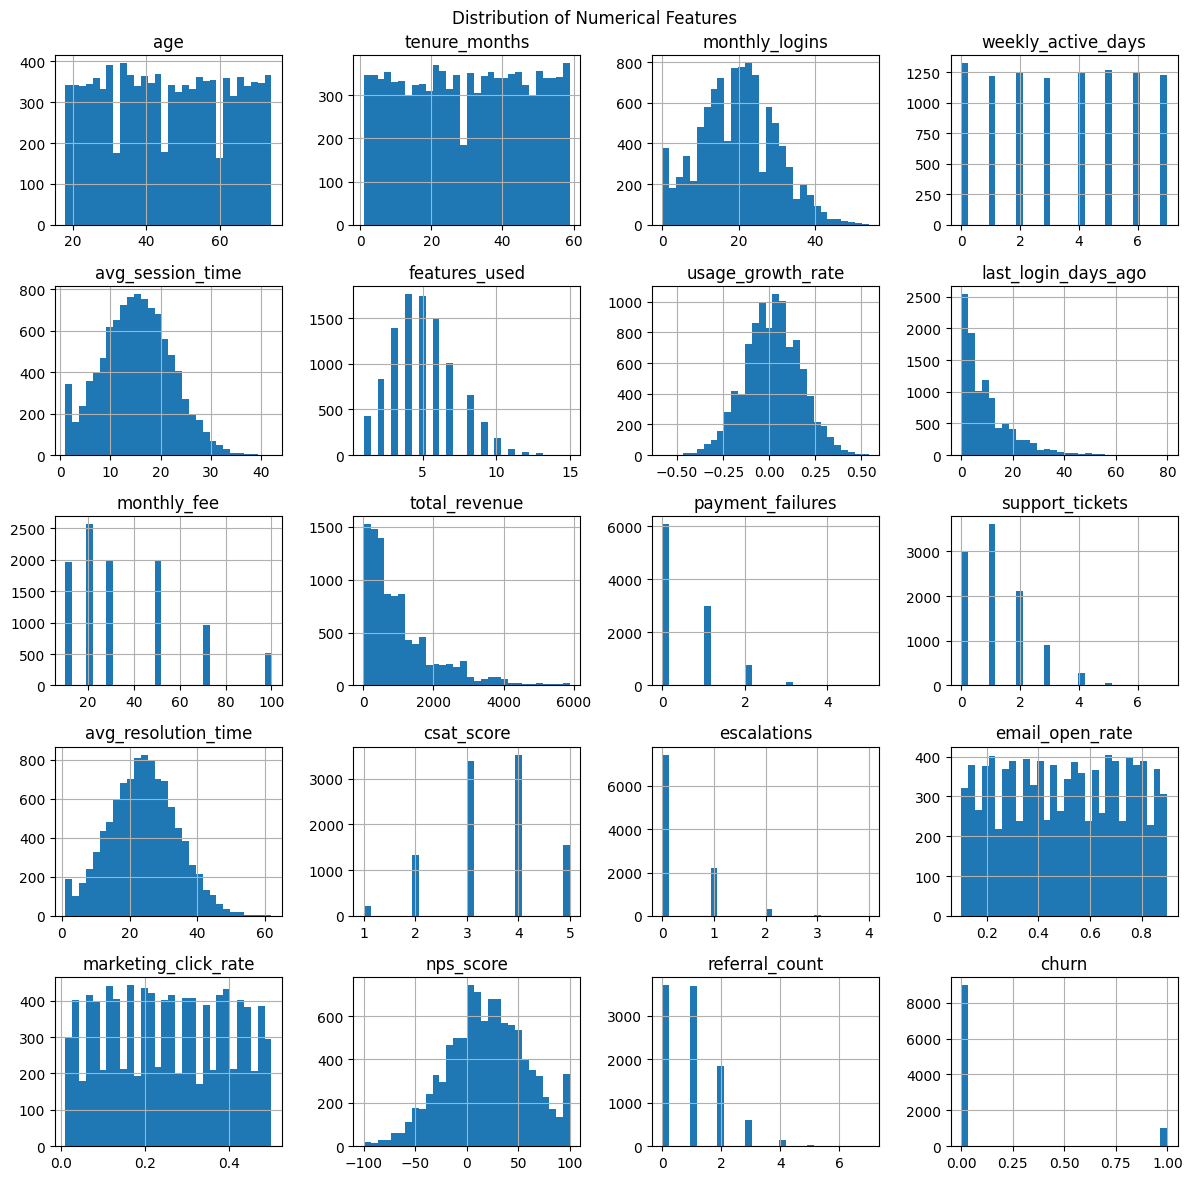

In [67]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols].hist(figsize=(12,12), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()


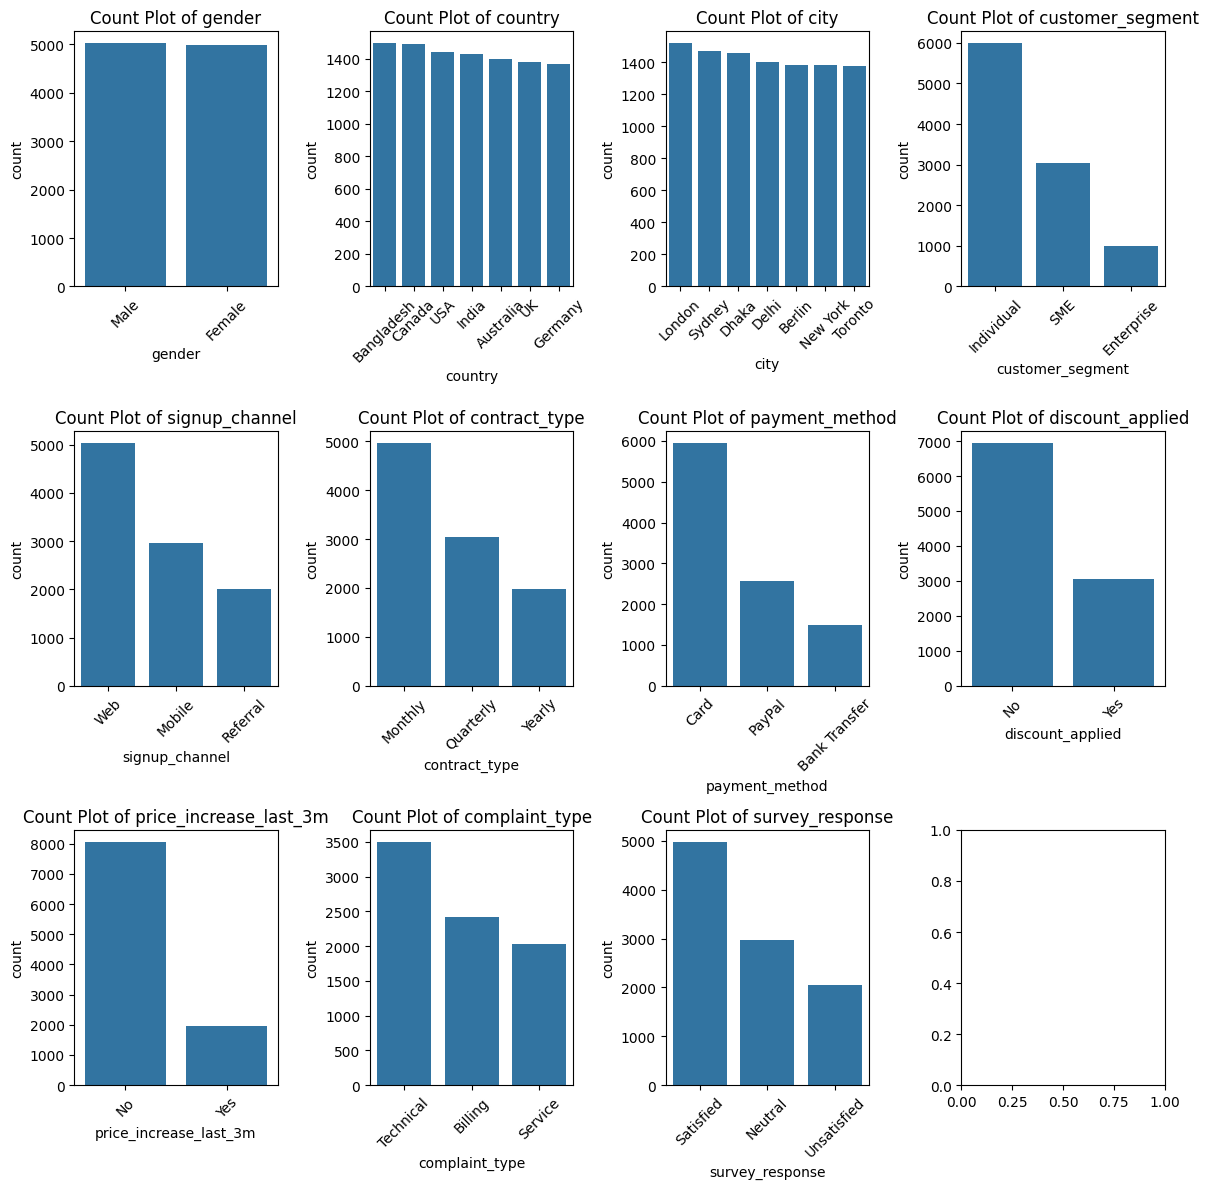

In [68]:
cat_cols = df.select_dtypes(include=['object']).columns

n = len(cat_cols)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))
axes = axes.flatten() 
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

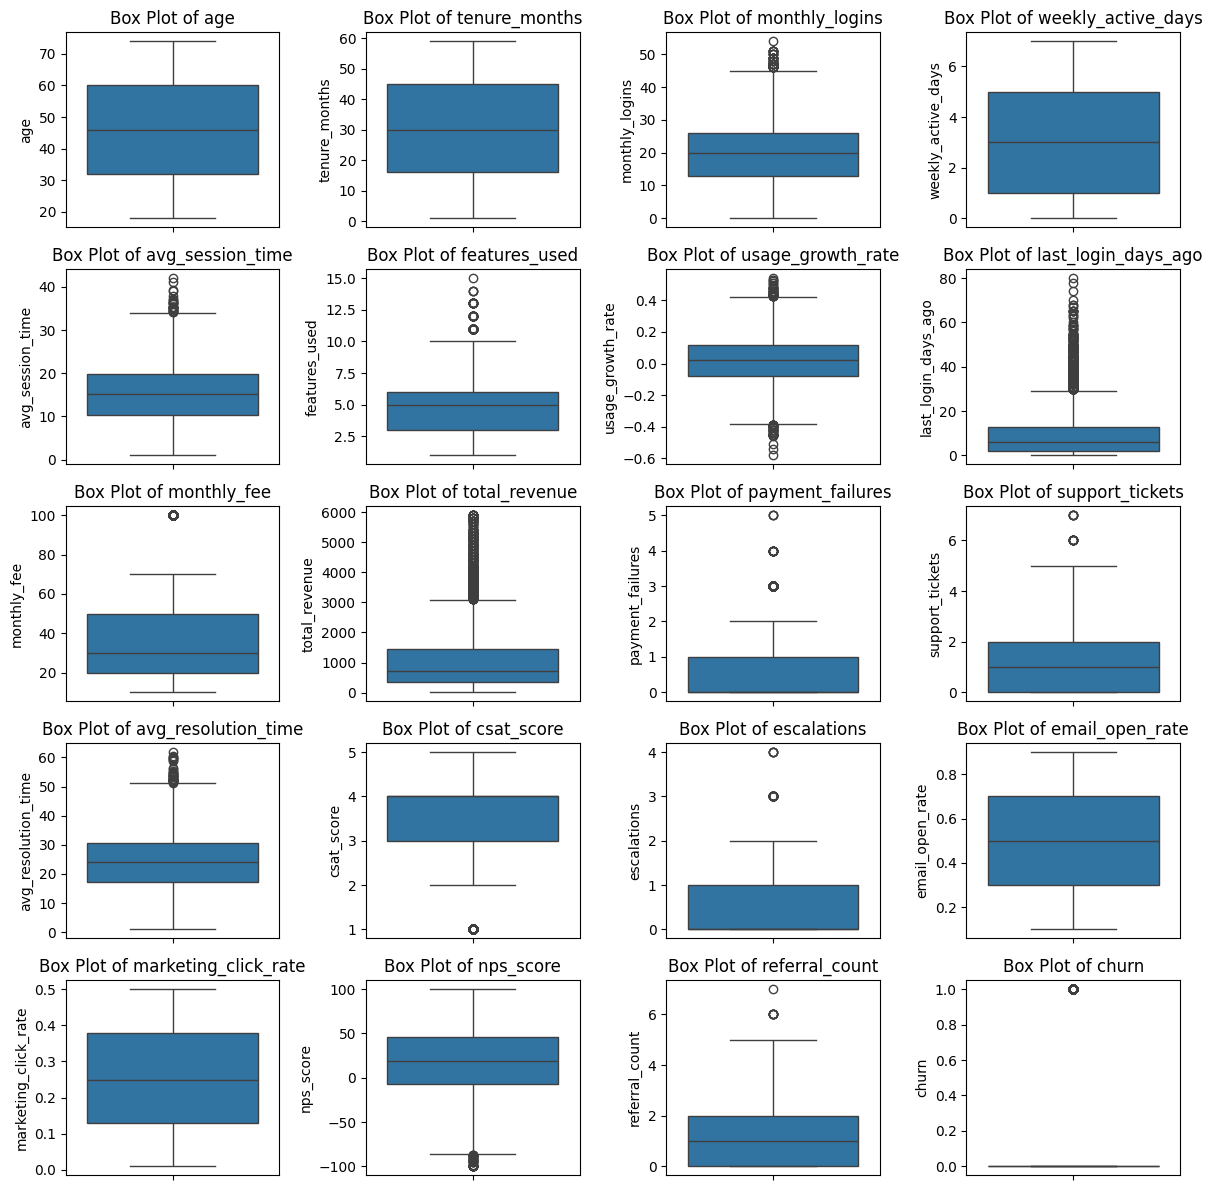

In [69]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(12, 12))
axes = axes.flatten() 

for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


### now let's see correlation between each column

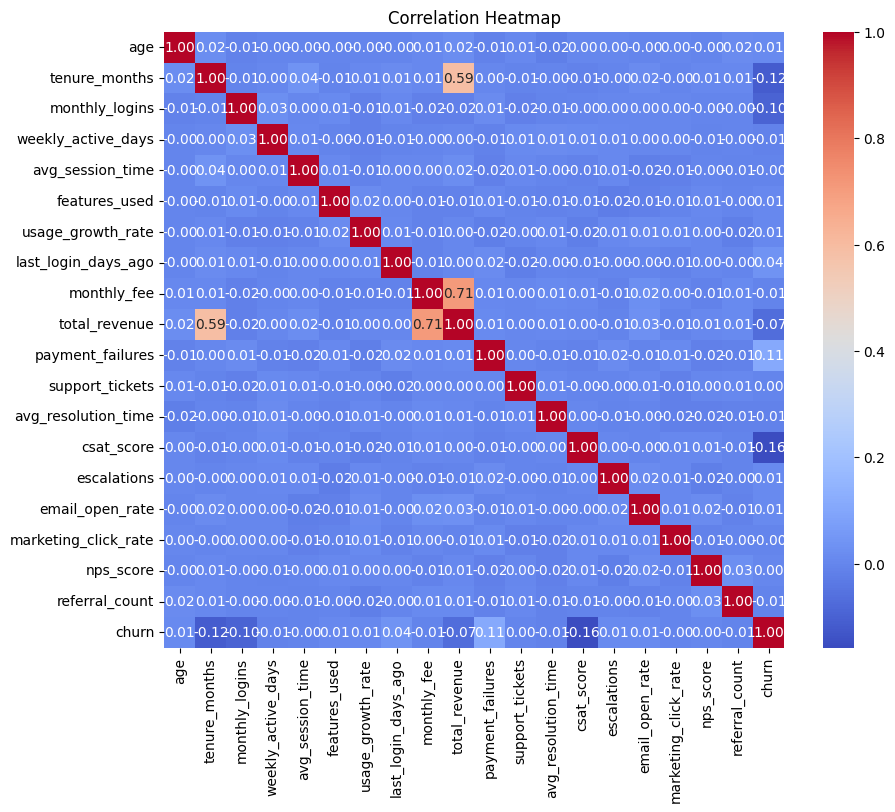

In [70]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [71]:
### devide data in x and y to split it in x-train,y-train and x-test,y-test
X=df.drop(columns=['churn'])
y=df['churn']

In [72]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)


In [73]:
### let's define numerical features and categorical features
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns



# Preprocessing for categorical and numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

# Fit on training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform test data
X_test_transformed = preprocessor.transform(X_test)


In [74]:
X_train_transformed


array([[ 1.        ,  0.        ,  0.        , ..., -0.31606366,
         1.00130299, -0.99584586],
       [ 0.        ,  1.        ,  0.        , ..., -1.74057595,
         0.35853563,  0.00917078],
       [ 1.        ,  0.        ,  0.        , ...,  1.60702792,
        -0.33565311, -0.99584586],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -1.59812472,
         1.41267409,  0.00917078],
       [ 1.        ,  0.        ,  0.        , ..., -0.10238682,
         0.82132813,  0.00917078],
       [ 0.        ,  1.        ,  0.        , ..., -1.17077104,
        -1.51834505, -0.99584586]], shape=(8000, 58))

In [75]:
X_test_transformed

array([[ 1.        ,  0.        ,  0.        , ...,  0.82354617,
        -0.30994242, -0.99584586],
       [ 0.        ,  1.        ,  0.        , ..., -0.74341735,
         1.48980618,  0.00917078],
       [ 0.        ,  1.        ,  0.        , ..., -0.17361243,
        -0.20709964,  1.01418741],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -1.31322226,
         0.15285008, -0.99584586],
       [ 1.        ,  0.        ,  0.        , ...,  1.03722301,
         0.97559229,  0.00917078],
       [ 1.        ,  0.        ,  0.        , ...,  0.11129002,
         0.10142869,  3.02422067]], shape=(2000, 58))

In [78]:
### let's create model dictionary
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier( eval_metric='logloss', random_state=42)
}


    
    
    


In [79]:
results = {}
### now let's create an automated process using for loop which do training,predicting and evaluation process on each model of our above model 
### dictionary and will store the result in above result dictionary
for name, model in models.items():
    # Train
    model.fit(X_train_transformed, y_train)
    
    # Predict
    y_pred = model.predict(X_test_transformed)
    
    # Evaluate
    if name == "LinearRegression":
        score = r2_score(y_test, y_pred)   # regression metric
    else:
        score = accuracy_score(y_test, y_pred)  # classification metric
    
    results[name] = score

# Show results
print("Model Performance:")
for model, score in results.items():
    print(f"{model}: {score:.4f}")


Model Performance:
LogisticRegression: 0.8965
DecisionTree: 0.8295
RandomForest: 0.8980
XGBoost: 0.8880


In [80]:
### from above results we can clearly see that RandomForest is doing well among the all models so we will go with RandomForest 
### for cross validation and GridSearchCV
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestClassifier(random_state=42),
                         X_train_transformed, y_train, cv=5, scoring='accuracy')
print("Random Forest CV Accuracy:", scores.mean())


Random Forest CV Accuracy: 0.89825


In [81]:
### let's do GridSEarchCV to find the best RandomForest model with the best parameter 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_transformed, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 0.89825
